In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

Matplotlib is building the font cache; this may take a moment.


In [2]:
from numpy.linalg import cholesky

In [3]:
def cov_matrixBM(steps):
    
    n = steps
    cov_matrix = np.ones((n,n))
    
    for t in range(n):
        for s in range(t+1):
            cov_matrix[t,s] = (s+1)/n
            cov_matrix[s,t] = cov_matrix[t,s]
    return cov_matrix

In [4]:
def gaussian_IID(N): 
    Z=np.random.normal(0,1,N)
    return Z

In [5]:
#Number 1
def BlackScholes(T, K, St, t, r, sigma):
    dp = (math.log(St/K) + (r + (sigma**2)/2)*(T-t))/(sigma * math.sqrt(T-t)) #finds d+ using the formula
    dm = (math.log(St/K) + (r - (sigma**2)/2)*(T-t))/(sigma * math.sqrt(T-t)) #finds d- using the formula
    call = St * norm.cdf(dp) - K * math.exp(-r * (T-t)) * norm.cdf(dm)
    #applys BlackScholes formula to find the price of the call
    put = call - St + K * math.exp(-r*(T-t)) #uses put cal parity to find the price of the put
    return call, put #returns both the call the put

In [6]:
call, put = BlackScholes(60/365, 100, 100, 0, 0.05, 0.1)
print("the call = ", call)
print("the put = ", put)
#runs the function for values from the hw, get similar result for the hw

the call =  2.0530056357846505
the put =  1.2344563368725545


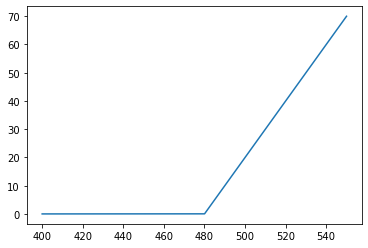

In [7]:
#Number 2 a) Call option
St = [400+i/100 for i in range(15001)] #increments the ST by a penny
payoff = []
for j in range(15001): 
    #loops through St and checks if the conditions are met for each scenario
    if(St[j] > 480):
        payoff.append(St[j] - 480) #appends proper payoff for each method
    else:
        payoff.append(0)
plt.plot(St, payoff) #plots the payoff
plt.show()
#Same method applied for the other options, but with different if statments and different payoffs

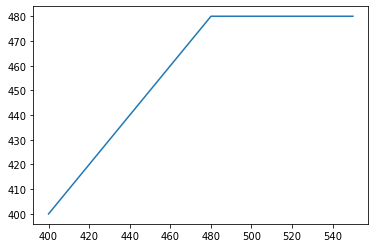

In [8]:
#Number 2 a) Covered Call
St = [400+i/100 for i in range(15001)]
payoff = []
for j in range(15001):
    if(St[j] >= 0 and St[j] <= 480):
        payoff.append(St[j])
    elif(St[j] > 480):
        payoff.append(480)
plt.plot(St, payoff)
plt.show()

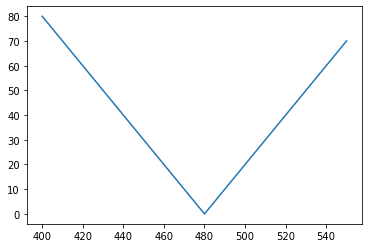

In [9]:
#Number 2 a) Straddle
St = [400+i/100 for i in range(15001)]
payoff = []
for j in range(15001):
    if(St[j] >= 0 and St[j] <= 480):
        payoff.append(480 - St[j])
    elif(St[j] > 480):
        payoff.append(St[j] - 480)
plt.plot(St, payoff)
plt.show()

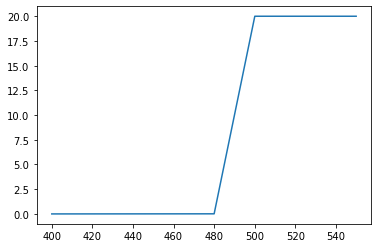

In [10]:
#Number 2 a) Bull call spread
St = [400+i/100 for i in range(15001)]
payoff = []
for j in range(15001):
    if(St[j] >= 0 and St[j] <= 480):
        payoff.append(0)
    elif(St[j] >= 480 and St[j] <= 500):
        payoff.append(St[j] - 480)
    else:
        payoff.append(20)
plt.plot(St, payoff)
plt.show()

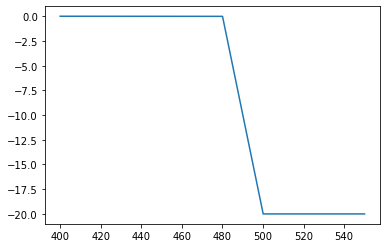

In [11]:
#Number 2 a) Bear call spread
St = [400+i/100 for i in range(15001)]
payoff = []
for j in range(15001):
    if(St[j] >= 0 and St[j] <= 480):
        payoff.append(0)
    elif(St[j] >= 480 and St[j] <= 500):
        payoff.append(480 - St[j])
    else:
        payoff.append(-20)
plt.plot(St, payoff)
plt.show()

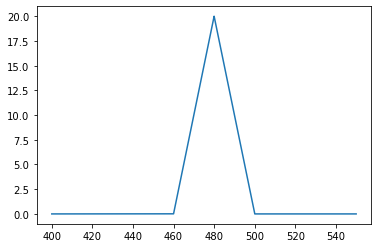

In [12]:
#Number 2 a) Butterfly
St = [400+i/100 for i in range(15001)]
payoff = []
for j in range(15001):
    if(St[j] >= 0 and St[j] <= 460):
        payoff.append(0)
    elif(St[j] >= 460 and St[j] <= 480):
        payoff.append(St[j] - 460)
    elif(St[j] >= 480 and St[j] <= 500):
        payoff.append(500 - St[j])
    else:
        payoff.append(0)
plt.plot(St, payoff)
plt.show()

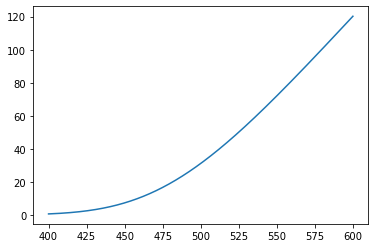

In [13]:
#Number 2 b) Call option r = 0
St = [400+i/10 for i in range(2001)] #increments ST by a dime
payoff = []
for j in range(2001):
    #loops through ST and calculates the call(s)/put(s) using the BlackScholes function from 
    #problem one and appends the proper payoff
    call, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    payoff.append(call)
plt.plot(St, payoff)
plt.show()
#Same thing is done for r = 0.05
#Altered version of this version is applied for the other options

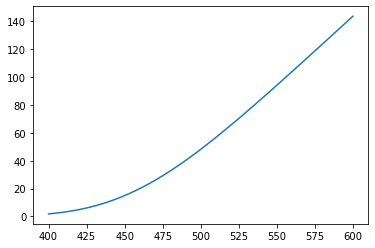

In [14]:
#Number 2 b) Call option r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    payoff.append(call)
plt.plot(St, payoff)
plt.show()

In [15]:
#It reaches a higher upper bound for the call price, when r = 0.05

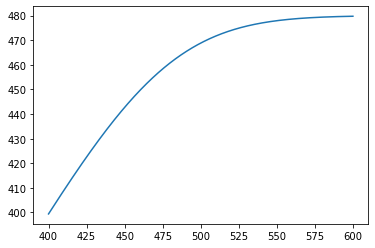

In [15]:
#Number 2 b) Covered Call option r = 0
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    payoff.append(St[j] - call)
plt.plot(St, payoff)
plt.show()

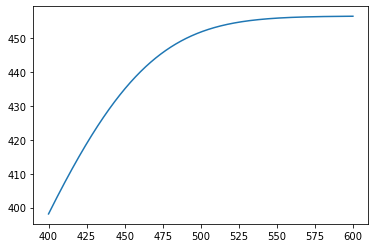

In [16]:
#Number 2 b) Covered Call option r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    payoff.append(St[j] - call)
plt.plot(St, payoff)
plt.show()

In [17]:
#The Covered call flattens at 460ish instead 480 when r = 0.05

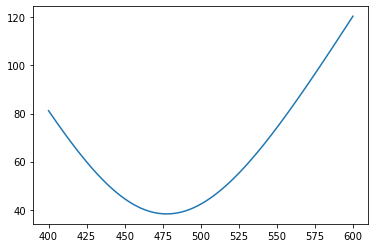

In [18]:
#Number 2 b) Straddle r = 0
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    payoff.append(call + put)
plt.plot(St, payoff)
plt.show()

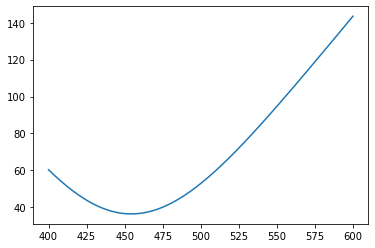

In [19]:
#Number 2 b) Straddle r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    payoff.append(call + put)
plt.plot(St, payoff)
plt.show()

In [21]:
#It starts at a smaller value and end at higher value when r = 0.05

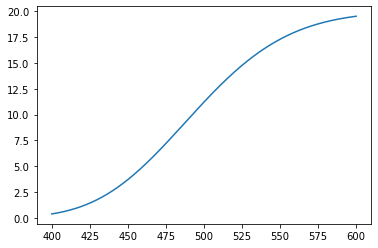

In [20]:
#Number 2 b) Bull call spread r = 0
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    call2, put = BlackScholes(1, 500, St[j], 0, 0, 0.1)
    payoff.append(call1 - call2)
plt.plot(St, payoff)
plt.show()

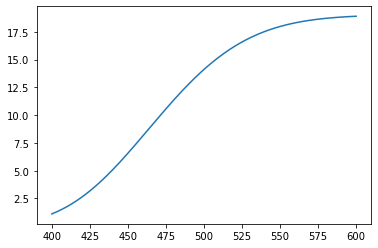

In [21]:
#Number 2 b) Bull call spread r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    call2, put = BlackScholes(1, 500, St[j], 0, 0.05, 0.1)
    payoff.append(call1 - call2)
plt.plot(St, payoff)
plt.show()

In [24]:
#It is tighter and flattens closer to 18 for r = 0.05 

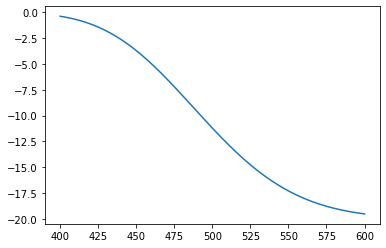

In [22]:
#Number 2 b) Bear call spread r = 0
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    call2, put = BlackScholes(1, 500, St[j], 0, 0, 0.1)
    payoff.append(call2 - call1)
plt.plot(St, payoff)
plt.show()

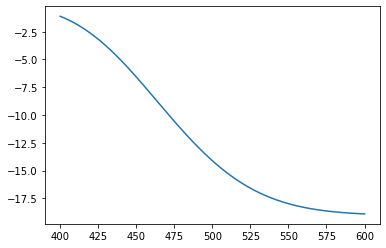

In [23]:
#Number 2 b) Bear call spread r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    call2, put = BlackScholes(1, 500, St[j], 0, 0.05, 0.1)
    payoff.append(call2 - call1)
plt.plot(St, payoff)
plt.show()

In [27]:
#It is tighter and starts closer to -2 instead of 0 but end closer to -18 for r = 0.05.

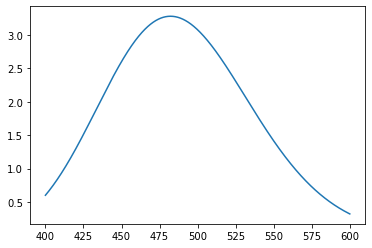

In [24]:
#Number 2 b) Butterfly r = 0
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 460, St[j], 0, 0, 0.1)
    call2, put = BlackScholes(1, 480, St[j], 0, 0, 0.1)
    call3, put = BlackScholes(1, 500, St[j], 0, 0, 0.1)
    payoff.append(call1 - 2*call2 + call3)
plt.plot(St, payoff)
plt.show()

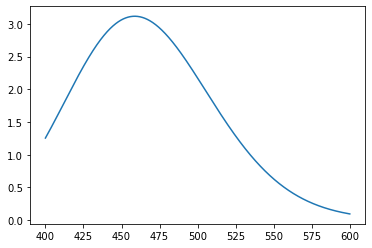

In [29]:
#Number 2 b) Butterfly r = 0.05
St = [400+i/10 for i in range(2001)]
payoff = []
for j in range(2001):
    call1, put = BlackScholes(1, 460, St[j], 0, 0.05, 0.1)
    call2, put = BlackScholes(1, 480, St[j], 0, 0.05, 0.1)
    call3, put = BlackScholes(1, 500, St[j], 0, 0.05, 0.1)
    payoff.append(call1 - 2*call2 + call3)
plt.plot(St, payoff)
plt.show()

In [30]:
#It starts at a higher value for r =0.05

In [25]:
#Number 3 a)
average = 0 
for j in range(1000):
    maxS = St = 500 #initializes the max as S0
    Z = gaussian_IID(1000)
    for k in range(1, 1001):
        #generates the stock as we go through time
        St = St * math.exp(0.1 * Z[k-1] * math.sqrt(0.001) + 0.045 * (0.001))
        if(St > maxS): #Checks if it exceed the previous max and updates if needed
            maxS = St
    average += maxS #adds the max to the average
print("The price of Ot", average/1000 * math.exp(-0.05)) #prints the price by averaging and discounting 

The price of Ot 530.1013712771166


In [52]:
#Number 3 b)
average = 0
for j in range(1000):
    St = [500] #initializes S0
    Z = gaussian_IID(1000)
    it = 0
    for k in range(1001):
        if(k != 0): #use right hand Riemann sum to estimate the value of the integral 
            St.append(St[k-1] * math.exp(0.1 * Z[k-1] * math.sqrt(0.001) + 0.045 * (0.001)))
            it += math.log(St[k])
    average += math.exp(it * 0.001)
print("The price of Ot", average/1000 * math.exp(-0.05)) #prints the price by averaging and discounting 

The price of Ot 486.27337222239686


In [26]:
#Number 4 a)
A = cholesky(cov_matrixBM(100)) 
S = []
time = [i/100 for i in range(101)]
for i in range(100000):
    Z = gaussian_IID(100)
    B = [0]+list(A.dot(Z)) #generate a Brownian Motion
    for j in range(101):
        B[j] += time[j] #generate Btilda
    S.append(B) #append Btilda to S

In [27]:
#Number 4 b)
weight = [] 
for i in range(100000): #use the formula to calculte the weights of the paths
    weight.append(math.exp(-S[i][-1] + 0.5))
sumW = sum(weight) 
for i in range(100000): #converts the weights to probabilities
    weight[i] /= sumW
temp = []
for i in range(100000): 
    #create a temp list of index since np.random.choice only works for one dimensional lists
    temp.append(i)
Stilda_Index = np.random.choice(temp, 1000, False, weight) 
#get the 1000 indexes we need for Stilda
Stilda = []
for i in range(1000):
    Stilda.append(S[Stilda_Index[i]]) #store the result in a list

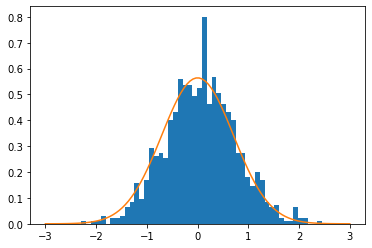

In [28]:
#Number 4 c)
temp = [] 
for i in range(1000):
    #get the Btilda at time 1/2 for the list
    temp.append(Stilda[i][50])
plt.hist(temp, density=True, bins=50, cumulative=False) #plot the Btildas at time 1/2
x = np.linspace(-3, 3, 100) 
plt.plot(x, norm.pdf(x, 0, math.sqrt(0.5))) 
plt.show()

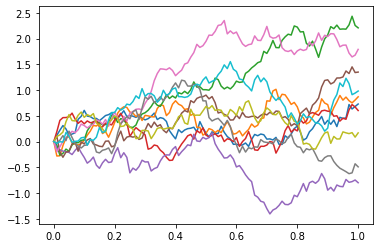

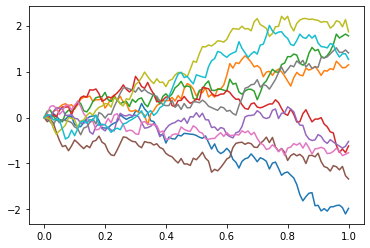

In [29]:
#Number 4 d) top is first 10 of S and bottom is first 10 Stilda
for i in range(10): 
    plt.plot(time, S[i])
plt.show()
for i in range(10):
    plt.plot(time, Stilda[i])
plt.show()